# AI_campus_ProstateSeg 
# Module 5: Image (Tile) Data Augmentation
### PANDA: Prostate cANcer graDe Assessment (PANDA) Challenge

This notebook walks through and demonstrates various ways in which augmentation can be applied to the image (tile) data from whole slide images from the PANDA toy dataset. Data Augmentation is a method by which new data can be created. This is often useful when there is a scarcity of data or when there is a class imbalance. For instance, one of two or multiple classes may be under-represented, and hence, its samples could be increased in quantity in order to mitigate the class imbalance, which is generally a requirement to train classification models fairly. Data augmentation applies random or strategically intended modifications to data in order to generate its variants. Often times, we want our machine learning models to be invariant to certain alterations in the data that it is making predictions on. For instance, given a dataset of images of men and women and a task of training a gender classification model, we could augment the dataset by rotating the images, flipping them, etc. These transformations do not change the class label associated with the images, because they do not change the causal features that map to the class label, such as long hair in women or shorter hair in men etc. We will perform the data augmentation steps using a pre-built library from pytorch: torchvision. Since our goal with this project is image segmentation, we need to apply the data augmentation both to the image and to its corresponding label mask in the pipeline. 

## 1. Import the necessary packages

In [51]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import panda_utils as putil
import torch
import torchvision.transforms as transforms

from PIL import Image
from typing import List, Union, Optional, Dict, Tuple
from torch.utils.data import Dataset
from dataclass import ToyPANDASDataset
from torchvision.transforms import functional as F

## 2. Define folder and subdirectory folder names

In [3]:
ROOT_FOLDER = "sample_data"
IMAGE_SUBFOLDER = "train_images"
MASK_SUBFOLDER = "train_label_masks"

image_dir = os.path.join(ROOT_FOLDER, IMAGE_SUBFOLDER)
mask_dir = os.path.join(ROOT_FOLDER, MASK_SUBFOLDER)

## 3. Create list of image and mask files and print contents

In [4]:
image_files = list(filter(lambda file: file != '.DS_Store', sorted(os.listdir(image_dir))))
mask_files = list(filter(lambda file: file != '.DS_Store', sorted(os.listdir(mask_dir))))

In [5]:
image_files

['0018ae58b01bdadc8e347995b69f99aa.tiff',
 '004dd32d9cd167d9cc31c13b704498af.tiff',
 '0068d4c7529e34fd4c9da863ce01a161.tiff',
 '006f6aa35a78965c92fffd1fbd53a058.tiff',
 '007433133235efc27a39f11df6940829.tiff',
 '0076bcb66e46fb485f5ba432b9a1fe8a.tiff',
 '008069b542b0439ed69b194674051964.tiff',
 '00928370e2dfeb8a507667ef1d4efcbb.tiff',
 '00951a7fad040bf7e90f32e81fc0746f.tiff',
 '00a26aaa82c959624d90dfb69fcf259c.tiff']

In [6]:
mask_files

['0018ae58b01bdadc8e347995b69f99aa_mask.tiff',
 '004dd32d9cd167d9cc31c13b704498af_mask.tiff',
 '0068d4c7529e34fd4c9da863ce01a161_mask.tiff',
 '006f6aa35a78965c92fffd1fbd53a058_mask.tiff',
 '007433133235efc27a39f11df6940829_mask.tiff',
 '0076bcb66e46fb485f5ba432b9a1fe8a_mask.tiff',
 '008069b542b0439ed69b194674051964_mask.tiff',
 '00928370e2dfeb8a507667ef1d4efcbb_mask.tiff',
 '00951a7fad040bf7e90f32e81fc0746f_mask.tiff',
 '00a26aaa82c959624d90dfb69fcf259c_mask.tiff']

From previous module 4, instantiate the PANDA dataset class. The class instantiation process will print out the following metrics for tile processing

- total number of tiles processed over the entire dataset
- tile qualifying ratio (the number of tiles from the total number of tiles that were processed)
- average number of tiles processed per image or mask
- average number of tiles qualifying per image or mask

In [8]:
panda_dataset = ToyPANDASDataset(image_dir = image_dir,
                                 mask_dir = mask_dir,
                                 root_dir = ROOT_FOLDER)

Total number of tiles processed: 38593
Tile qualifying ratio: 0.15458761951649264
Average number of tiles processed per image or mask: 3859.3
Average number of tiles qualifying per image or mask: 596.6


Print out the length of the dataset class, this will return the number of qualifying tiles over the entire dataset, which is the number of tuples contained in the imtile_coords list in the dataset class.

In [9]:
len(panda_dataset)

5966

Access one element of the dataset class, which will call the __getitem__ method. It returns a single, non-batched data point, which is a tile of dimensionality (224, 224, 3)

In [25]:
panda_dataset[0].shape

(224, 224, 3)

Plot one of the tiles

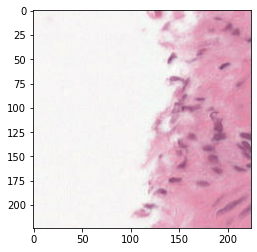

In [13]:
plt.imshow(panda_dataset[10])

### A. Augmentation Type: Rotation

Rotate the image by a specific angle.

Angle = 10 degrees.

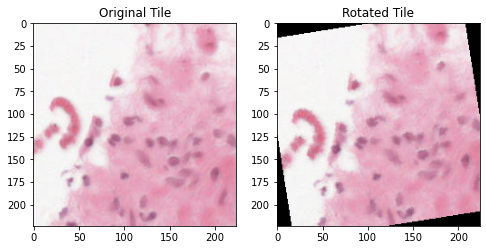

In [27]:
rotation_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=10),  
    transforms.ToTensor()
])

tile = panda_dataset[0] 
rotated_tile = rotation_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(rotated_tile.permute(1,2,0))
plt.title('Rotated Tile')
plt.show()

Angle = 30 degrees.

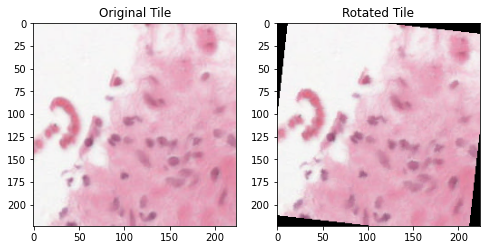

In [28]:
rotation_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=30),  
    transforms.ToTensor()
])

tile = panda_dataset[0] 
rotated_tile = rotation_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(rotated_tile.permute(1,2,0))
plt.title('Rotated Tile')
plt.show()

Angle = 60 degrees.

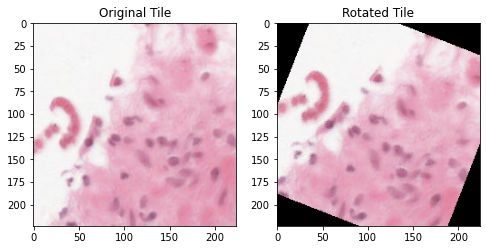

In [29]:
rotation_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=60),  
    transforms.ToTensor()
])

tile = panda_dataset[0] 
rotated_tile = rotation_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(rotated_tile.permute(1,2,0))
plt.title('Rotated Tile')
plt.show()

Angle = 90 degrees.

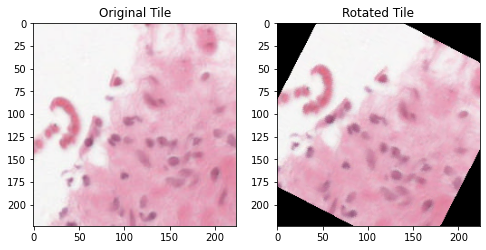

In [30]:
rotation_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=90),  
    transforms.ToTensor()
])

tile = panda_dataset[0] 
rotated_tile = rotation_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(rotated_tile.permute(1,2,0))
plt.title('Rotated Tile')
plt.show()

### B. Augmentation Type: Horizontal Flip

Flip the image horizontally

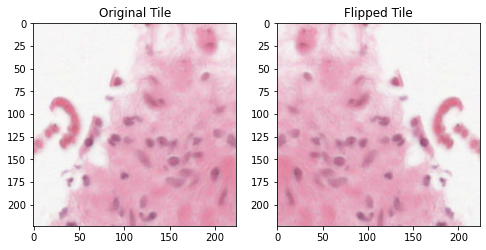

In [35]:
flip_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1.0), 
    transforms.ToTensor()
])

flipped_tile = flip_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(flipped_tile.permute(1,2,0))
plt.title('Flipped Tile')
plt.show()

### C. Augmentation Type: Vertical Flip

Flip the image vertically

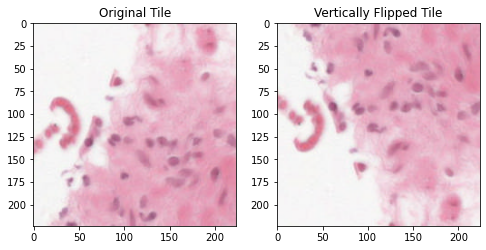

In [36]:
flip_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=1.0), 
    transforms.ToTensor()
])

flipped_tile = flip_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(flipped_tile.permute(1,2,0))
plt.title('Vertically Flipped Tile')
plt.show()

### D. Augmentation Type: Color Jitter

Randomly change the brightness, contrast, and saturation of the image

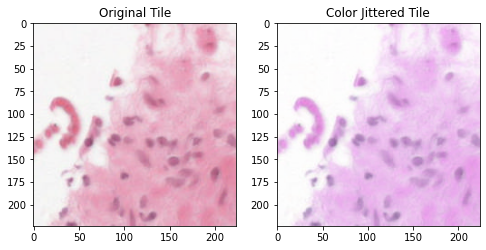

In [38]:
jitter_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

jittered_tile = jitter_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(jittered_tile.permute(1,2,0))
plt.title('Color Jittered Tile')
plt.show()

Re-plot the tile by applying color jittering variations by changing the values of brightness, contrast, saturation, and hue. Increase the brightness to 0.8.

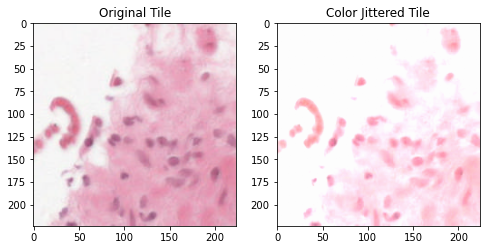

In [39]:
jitter_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.8, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

jittered_tile = jitter_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(jittered_tile.permute(1,2,0))
plt.title('Color Jittered Tile')
plt.show()

Re-plot the tile by applying color jittering variations by changing the values of brightness, contrast, saturation, and hue. Increase the contrast to 0.8.

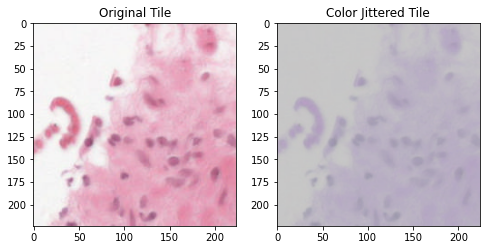

In [40]:
jitter_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.8, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

jittered_tile = jitter_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(jittered_tile.permute(1,2,0))
plt.title('Color Jittered Tile')
plt.show()

Re-plot the tile by applying color jittering variations by changing the values of brightness, contrast, saturation, and hue. Increase the saturation to 0.8.

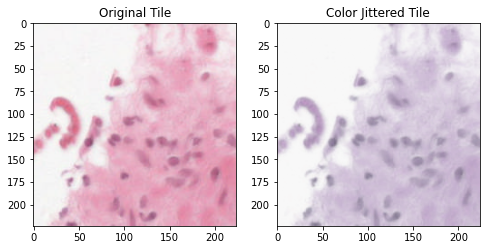

In [41]:
jitter_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.8, hue=0.2),
    transforms.ToTensor()
])

jittered_tile = jitter_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(jittered_tile.permute(1,2,0))
plt.title('Color Jittered Tile')
plt.show()

Re-plot the tile by applying color jittering by changing the values of brightness, contrast, saturation, and hue. Increase the hue to 0.5.

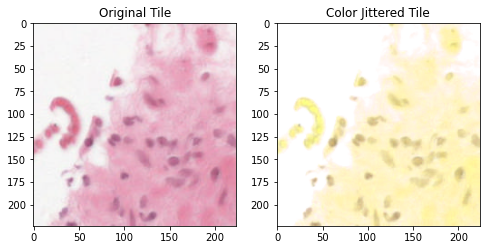

In [43]:
jitter_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.5),
    transforms.ToTensor()
])

jittered_tile = jitter_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(jittered_tile.permute(1,2,0))
plt.title('Color Jittered Tile')
plt.show()

### E. Augmentation Type: Random Crop

Randomly crop a portion of the image. In this case, randomly crop to 128 by 128 pixels.

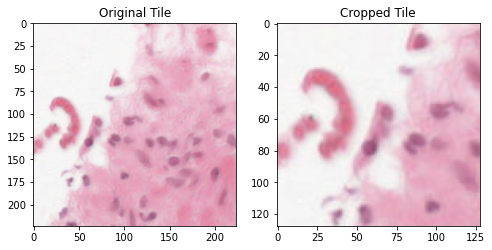

In [45]:
crop_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(128, 128)), 
    transforms.ToTensor()
])

cropped_tile = crop_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(cropped_tile.permute(1,2,0))
plt.title('Cropped Tile')
plt.show()

### F. Augmentation Type: Gaussian Blur

Applying Gaussian Blur to image.

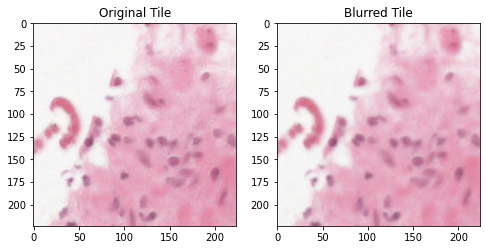

In [53]:
blur_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor()
])

blurred_tile = blur_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(blurred_tile.permute(1,2,0))
plt.title('Blurred Tile')
plt.show()

### G. Augmentation Type: Affine Transformation by Translation

Apply affine transformation by translating image. Translate image by 20%. The method will translate the image by a margin of 20%, and replace the translated area by black box.

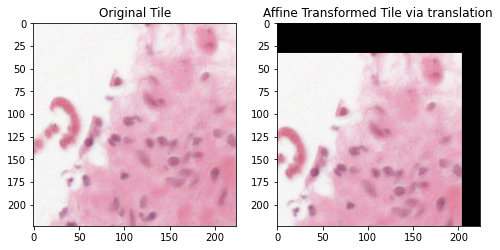

In [58]:
affine_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)), 
    transforms.ToTensor()
])

affine_tile = affine_transform(tile)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(affine_tile.permute(1,2,0))
plt.title('Affine Transformed Tile via translation')
plt.show()

### H. Augmentation Type: Noise Addition

Augment image by addition of minor noise. 

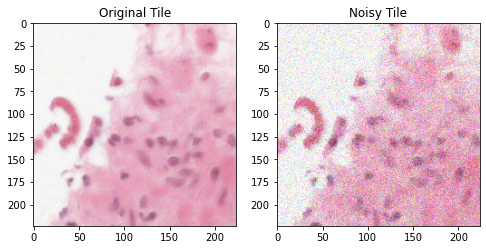

In [62]:
def add_noise(image, 
              noise_factor: int = 0.1):
    """
    Add noise to an input image and return it. 
    The noise matrix is generated by randomly sampling
    numbers from a standard normal distribution with
    mean of 0 and stanard deviation of 1. Then, this
    noise matrix is multiplied by a noise factor and
    then added to the image. The values are added in 
    an element by element wise way. 
    
    Parameters
    ----------
    
    image: (H, W, C) 
        image of shape (Height, Width, and number of channels)
        which is to be augmented by noise addition.
        
    noise_factor: float (default = 0.1)
        noise_factor to be multiplied to the randomly sampled
        noise matrix. 
        
    Returns
    ----------
    noisy_image: (H, W, C)
        noisy image of shape (Height, Width, and number of channels)
        
    """
    
    noise = torch.randn(image.size()) * noise_factor
    noisy_image = image + noise
    noisy_image = torch.clamp(noisy_image, 0.0, 1.0)
    return noisy_image

tile_tensor = torch.tensor(tile).float() / 255.0 
noisy_tile = add_noise(tile_tensor)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(tile)
plt.title('Original Tile')
plt.subplot(1, 2, 2)
plt.imshow(noisy_tile)
plt.title('Noisy Tile')
plt.show()